# Практика 7

In [1]:
# Блок импортов
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

2024-05-27 01:56:50.539083: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 01:56:50.539250: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 01:56:50.541326: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 01:56:50.568491: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 01:56:51.075659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Подготовка данных

In [2]:
# Загрузка набора данных Mnist в массивы для обучения и тестирования
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация входных данных
x_train = x_train / 255
x_test = x_test / 255

# Категорирование числовых меток обучающей части набора Mnist
y_train_cat = keras.utils.to_categorical(y_train, 10)

# Категорирование числовых меток тестовой части набора Mnist
y_test_cat = keras.utils.to_categorical(y_test, 10)

Создание и настройка модели СНС

In [3]:
# Модель СНС
model = keras.Sequential([
	Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Посмотреть параметры СНС и входной вектор
print(model.summary())
print(x_train.shape)

/home/lmoloch/Документы/Other/Liberman/sstu-lib78/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-27 01:56:51.783725: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 01:56:51.784027: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/in

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None
(60000, 28, 28, 1)


Сборка, обучение и сохранение модели СНС

In [4]:
# Сборка модели СНС
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Обучение модели СНС
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
model.evaluate(x_test, y_test_cat)
model.save('res/model_7-1.h5')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9047 - loss: 0.3226 - val_accuracy: 0.9868 - val_loss: 0.0500
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9866 - loss: 0.0444 - val_accuracy: 0.9877 - val_loss: 0.0393
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9919 - loss: 0.0274 - val_accuracy: 0.9887 - val_loss: 0.0392
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9944 - loss: 0.0155 - val_accuracy: 0.9918 - val_loss: 0.0315
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9887 - loss: 0.0316


Загрузка модели, визуализация результата работы с использованием своих изображений

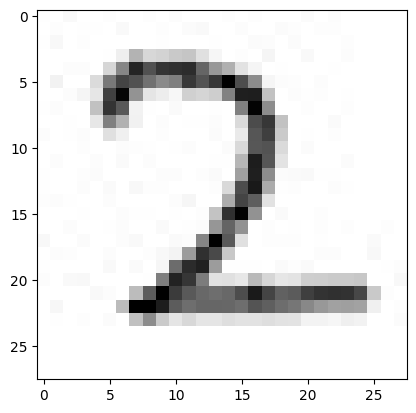

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2


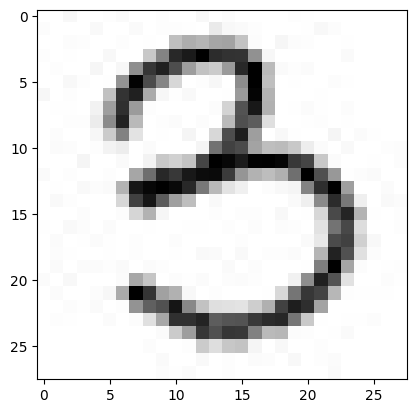

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3


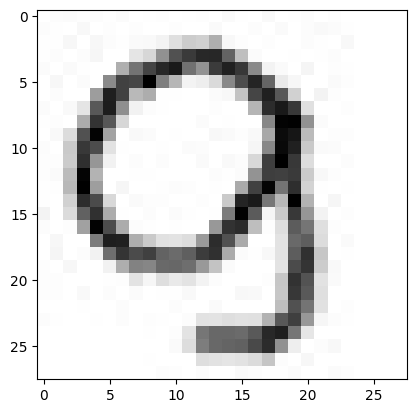

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9


In [21]:
# Загрузка модели
new_model = keras.models.load_model('res/model_7-1.h5')

for i in 2, 3, 9:
	# Загружаем собственное изображение
	image = plt.imread('res/img/7-1/' + str(i) + '.jpg')
	image = np.mean(image, axis=2) / 255.0

	# Добавление размерности к изображению для совместимости с входом модели
	image = np.expand_dims(image, axis=-1)
	image = np.expand_dims(image, axis=0)

	# Отображаем изображение
	plt.imshow(image[0, :, :, 0], cmap='gray')
	plt.show()

	# Предсказываем и выводим в консоль предсказанный класс
	predictions = model.predict(image)
	predicted_digit = np.argmax(predictions)
	print(predicted_digit)